In [43]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

In [39]:
mnist = fetch_openml('mnist_784', version=1 , as_frame=False)

In [44]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [62]:
X,y= mnist.data , mnist.target
print(X.shape,y.shape)

(70000, 784) (70000,)


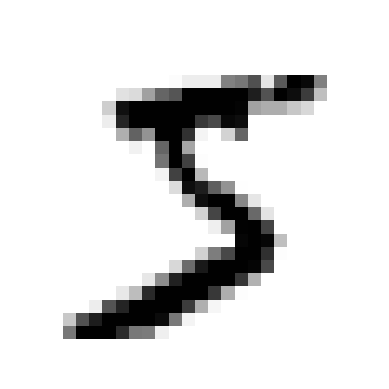

In [107]:
def print_number(data):    
    some_digit_image=data.reshape(28,28)
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

some_number = X[0]
print_number(some_number)

In [102]:
X_train , X_test , y_train , y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [108]:
y_train_5 = (y_train == '5')
y_train_5 ## True for all 5s

array([ True, False, False, ...,  True, False, False])

In [109]:
from sklearn.linear_model import SGDClassifier

In [110]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [111]:
sgd_clf.predict([some_number])

array([ True])

In [112]:
from sklearn.model_selection import cross_val_score

In [114]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")
## 95% accurate

array([0.95035, 0.96035, 0.9604 ])

In [115]:
# A much better way to evaluate the performance of classifier is to look at the confusion matrix , The general idea
# is to count the number of times instance of class A are classified as class B 

In [116]:
from sklearn.model_selection import cross_val_predict
# it's like cross validation score but return the predicton made on each test fold
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [124]:
from sklearn.metrics import confusion_matrix
cum = confusion_matrix(y_train_5, y_train_pred)
print(cum)

[[53892   687]
 [ 1891  3530]]


In [125]:
## It means we have error and :
## 53892 : TN we clasified non-5 item correctly
## 3530: TP we classified 5 correctly
## 687: FP we classified 5 wrongly 
## 1891: FN classified non-5 wrongly

In [126]:
# we will to find a best way to have diagnol confusion matrix like this : 
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [127]:
# we want to calcualte precision , it means : TP / TP + FP , TP / All things we predicted
from sklearn.metrics import precision_score , recall_score 
precision_score(y_train_5,y_train_pred)

cum[1, 1] / (cum[0, 1] + cum[1, 1])

0.8370879772350012

In [128]:
## Recall . TP / TP + FN
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [129]:
## When it claims an image represents a 5, it is correct only 83.7% of the time. More‐over, 
## it only detects 65% of the 5s.


In [130]:
# we can combine recall and precision to a variable as name harmonic mean 
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [ ]:
# you can’t have it both ways: increasing precision reduces recall, and vice versa. 
# This is called the precision/recall trade-off.